# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, add comments and conclusions about your findings and describe anything you want to analyze in the future.

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

Each unit test that you pass is 1 point. 

There are 5 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).** 
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy` 
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline` 
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [ ]:
# YOUR CODE HERE
# !python -m spacy download en_core_web_sm 

In [ ]:
!pip install gensim==3.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import pandas as pd
import numpy as np


# Plotting
# import squarify
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from sklearn.neighbors import NearestNeighbors #NearestNeighbors 
from sklearn.pipeline import Pipeline #Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier #KneighborsClassifier
from sklearn.model_selection import GridSearchCV #GridSearchCV
import gensim #gensim
import gensim.corpora as corpora #corpora
from gensim.models.ldamodel import LdaModel #LdaModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamulticore import LdaMulticore



In [ ]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [ ]:
# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
# YOUR CODE HERE
df = pd.read_json(data_url, lines = True)

In [ ]:
df

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA
...,...,...,...,...,...,...,...,...,...
9995,1h3ysSuSazvXc1aeLiiOew,0,2017-10-07 10:57:15,1,kAYnguBAJ2Ovzz5s49fMcQ,1,My family and I were hungry and this Subway is...,1,QFYqAk8n5Z1O3t7zwjA7Hg
9996,Rwahe1zbFpw6VIjb5ngZeg,0,2014-01-18 15:52:52,0,5Huai3nJAaeN8X0vCXqOew,3,My wife and I came here with a a couple of fri...,0,X7jQ-4788irfe5ABZNvYcA
9997,8itGZAOBMiTbHKOwLuh4_Q,0,2018-08-26 02:53:21,0,wmRCto8yNnmMCNc_nfL5Dg,2,The food was just OK and not anything to brag ...,0,_pi5J_1CIQWceLhTJkx_yA
9998,A5Rkh7UymKm0_Rxm9K2PJw,0,2018-04-23 23:36:07,0,zlIU9GEI3MP5LXBpEM5qsw,4,Today's visit is great!! Love and enjoy Town S...,0,PP1K311ZKbpDgTjwic3u5Q


In [ ]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

In [ ]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [ ]:
def tokenize(doc):
  docu = nlp(doc)
  lemma_list = [token.lemma_.lower().strip() for token in docu if (not token.is_stop) 
                                                                and (not token.is_punct)
                                                                and (not token.is_digit)
                                                                and (not token.like_num)
                                                                and (token.lemma_.strip()!="") 
                                                                and (len(token.lemma_.strip())>1)]
  return lemma_list

In [ ]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

In [ ]:
# df['tokens'] = df['text'].apply(tokenize)

In [ ]:
df


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA
...,...,...,...,...,...,...,...,...,...
9995,1h3ysSuSazvXc1aeLiiOew,0,2017-10-07 10:57:15,1,kAYnguBAJ2Ovzz5s49fMcQ,1,My family and I were hungry and this Subway is...,1,QFYqAk8n5Z1O3t7zwjA7Hg
9996,Rwahe1zbFpw6VIjb5ngZeg,0,2014-01-18 15:52:52,0,5Huai3nJAaeN8X0vCXqOew,3,My wife and I came here with a a couple of fri...,0,X7jQ-4788irfe5ABZNvYcA
9997,8itGZAOBMiTbHKOwLuh4_Q,0,2018-08-26 02:53:21,0,wmRCto8yNnmMCNc_nfL5Dg,2,The food was just OK and not anything to brag ...,0,_pi5J_1CIQWceLhTJkx_yA
9998,A5Rkh7UymKm0_Rxm9K2PJw,0,2018-04-23 23:36:07,0,zlIU9GEI3MP5LXBpEM5qsw,4,Today's visit is great!! Love and enjoy Town S...,0,PP1K311ZKbpDgTjwic3u5Q


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [ ]:
%%time
# YOUR CODE HERE
vect = CountVectorizer()
vect.fit(df['text'])
dtm = vect.transform(df['text'])
# dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names_out())

CPU times: user 2.12 s, sys: 18.7 ms, total: 2.14 s
Wall time: 2.29 s


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


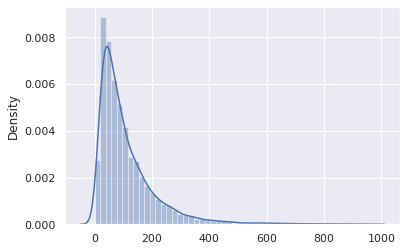

In [ ]:
doc_len = [len(doc.split()) for doc in df['text']]
sns.distplot(doc_len);

In [ ]:
# 1. Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', min_df=.02, max_df=.97, ngram_range=(1,3))

# 2. Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['text'])

# 3. View term-document matrix as DataFrame
# dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names_out())
print(dtm.shape)
dtm

(10000, 413)


<10000x413 sparse matrix of type '<class 'numpy.float64'>'
	with 204457 stored elements in Compressed Sparse Row format>


2. Write a fake review. Assign the text of the review to an object called `fake_review`. 
3. Query the fake review for the 10 most similar reviews, print the text of the reviews. 
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [ ]:
# Create and fit a NearestNeighbors model named "nn"
# YOUR CODE HERE
nn = NearestNeighbors(n_neighbors=10) #algorithm='kd_tree'
nn.fit(dtm)

NearestNeighbors(n_neighbors=10)

In [ ]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [ ]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
fake_review = "the food was very delicious. the service was good was well. i didn't have to wait long for my meal, and was greated with a drink. I had a very good time. the atmosphere was wonderful although the lights were too bright"

In [ ]:
f_review = [fake_review]
doc_tfidf = tfidf.transform(f_review)
doc_tfidf

<1x413 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
neigh_dist, neigh_index = nn.kneighbors(doc_tfidf.todense(), n_neighbors=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
print(neigh_index)
print(neigh_dist)

[[6311  469 9889 6204 4839 3543 7674 2703 7768 6075]]
[[1.         1.         1.         1.         1.         1.
  1.         1.08711479 1.09248243 1.10384683]]


In [ ]:
df['text'][6311]

'天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來'

In [ ]:
df['text'][469]

'O  o  thenk 6nnn  .b  cgv  xx TV cvg  9 nvehxcfvvv3c nb b  c  y4  nb and the vghvhridd h 0d  c       v   3,  vv  4  ruddy'

In [ ]:
df['text'][9889]

'Bon massage.  Spa propre organisé manque juste le stationnement prix abordable en promotion personnels respectueux'

In [ ]:
df['text'][6204]

'旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。\n質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 \nネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。\n予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。\nまた是非マッサージなどで伺いたいと思います。'

In [ ]:
df['text'][4839]

"Une superbe sélection de bières de microbrasserie québécoise avec sélection de fromages et charcuteries. Le personnel est très sympathique. La sélection de bières evolue constamment. Bravo à l'équipe."

In [ ]:
df['text'][3543]

'$25 for 2 weeks'

In [ ]:
df['text'][7674]

'J\'ai une relation amour/haine avec le marché Jean-Talon.\n\nDans l\'optique d\'y faire son "épicerie" pour la semaine, il y a effectivement trop de monde. Les périodes dites tranquilles sont lorsque le commun des mortels se retrouve assis au bureau (et encore là, même un mardi après-midi il peut y avoir trop de monde). À moins de savoir exactement où l\'on va (ce qui n\'est pas mon cas puisque je n\'ai jamais eu la chance de l\'explorer tranquillement), faire son marché peut être très désagréable.\n\nPar contre, si votre but c\'est d\'explorer tranquillement sans vous presser, en sirotant un smoothie de Mangue et Melon ou en dégustant un sorbet de Havre-aux-Glaces, c\'est parfait. \n\nBref j\'y trouve mon bonheur en y allant en "sortie" à l\'occasion, mais comme visite régulière comme je le faisais à une époque, j\'en vire folle.'

In [ ]:
df['text'][2703]

'Wait was long, food wait was long.. decent tasting food. Authentic Mexican food.. just the wait made it a exausting dinner. Alittle more onions then necessary'

In [ ]:
df['text'][7768]

'Delicious food and wonderful staff. Love the seafood here. Very beautiful dining atmosphere. Would be good for a date or a family dinner.'

In [ ]:
df['text'][6075]

'Long hot barbecue, good taste, delicious and delicious Chinese food barbecue \n\nThe best barbecue in a\u2006ri\u2006zo'

In [ ]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
X = df.text
y = df.stars

In [ ]:
#GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# # YOUR CODE HERE
vect = TfidfVectorizer(stop_words='english')
rfc = RandomForestClassifier(random_state=42)

In [ ]:
pipe = Pipeline([
    ('vect', vect),      # TF-IDF Vectorizer
    ('clf', rfc)         # Random Forest Classifier 
])
pipe

Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('clf', RandomForestClassifier(random_state=42))])

In [ ]:
parameters = {
    'vect__max_df': (0.75, 1),    
    'clf__max_depth': (10,20)               
}



# Run grid search
gs = GridSearchCV(pipe, parameters, n_jobs=1, verbose=1) #cv=5,
gs.fit(X,y)   #df_train['text']

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'clf__max_depth': (10, 20), 'vect__max_df': (0.75, 1)},
             verbose=1)

In [ ]:
# x_train.shape

In [ ]:
# y_train.shape

In [ ]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

In [ ]:
prediction

5

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object. 
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model. 

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# Do not change this value 
num_topics = 5

In [ ]:
# YOUR CODE HERE
tokens = [tokenize(doc) for doc in df['text']]
id2word = corpora.Dictionary(tokens)
corpus = [id2word.doc2bow(doc_lemmas) for doc_lemmas in tokens]

In [ ]:
num_topics = 5
lda = LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=num_topics, 
                    passes=1,              # Runtime related parameter
                    random_state=42)

#### Testing

In [ ]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'


#### 2. Create 1-2 visualizations of the results. Assign one of the visualizations to a variable called `visual_plot`.


In [ ]:
# !pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim_models
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:

# Use a ploting tool of your choice to visualize your results. 

# YOUR CODE HERE
# pyLDAvis.enable_notebook()
# visual_plot = pyLDAvis.gensim_models.prepare(lda, corpus, id2word)
# visual_plot

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.000209  0.005174       1        1  27.056047
0     -0.029205  0.010310       2        1  25.308411
4     -0.008291 -0.035680       3        1  18.350581
2      0.037920  0.000282       4        1  15.651444
3     -0.000216  0.019914       5        1  13.633518, topic_info=        Term         Freq        Total Category  logprob  loglift
38      good  6297.000000  6297.000000  Default  30.0000  30.0000
1063  coffee   622.000000   622.000000  Default  29.0000  29.0000
16      like  3672.000000  3672.000000  Default  28.0000  28.0000
85      nice  1698.000000  1698.000000  Default  27.0000  27.0000
355    order  3501.000000  3501.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
70       get   257.868188  2615.611229   Topic5  -5.5333  -0.3242
936      new   189.551616  1126.857595   Topic5  -5.8411   0.2101
403      day   203.039222  1571.435704   Topic5  -5.7724  -0.0537
44     staff   198.099876  1620.936118   Topic5  -5.7970  -0.1093
35      come   206.457588  3981.771484   Topic5  -5.7557  -0.9667

[462 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
2750       1  0.051697  6:30
2750       2  0.878856  6:30
2750       3  0.051697  6:30
1444       1  0.262420  able
1444       2  0.451946  able
...      ...       ...   ...
304        3  0.172167  work
304        4  0.284896  work
304        5  0.169435  work
11250      1  0.985301   yuk
12974      1  0.960163  zach

[1061 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])

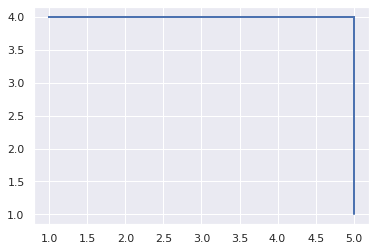

In [ ]:
f, visual_plot = plt.subplots()
plt.plot(gs.predict(X[:20]), y[y[:20]])

In [ ]:
# Visible Testing
assert visual_plot.__module__ == 'matplotlib.axes._subplots', "You must create and assign to visual_plot a visualization"
